In [ ]:
!pip install pyspatialml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 57.6 MB/s eta 0:00:00


In [ ]:
from pyspatialml import Raster
import rasterio
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 


In [ ]:
os.chdir('/content/drive/MyDrive/MC_NEW-20221123T154430Z-001/MC_NEW/ML_GROUP-20230119T153151Z-001/ML_GROUP')
os.listdir()

['LULC.tfw',
 'LULC.tif.ovr',
 'LULC.tif',
 'LULC.tif.vat.cpg',
 'LULC.tif.aux.xml',
 'LULC.tif.vat.dbf',
 'geo.tif.vat.dbf',
 'geo.tif',
 'geo.tif.vat.cpg',
 'geo.tif.ovr',
 'geo.tfw',
 'geo.tif.aux.xml',
 'litho.tif.vat.cpg',
 'litho.tfw',
 'litho.tif.vat.dbf',
 'litho.tif.aux.xml',
 'litho.tif',
 'litho.tif.ovr',
 'aspect.tfw',
 'aspect.tif.ovr',
 'aspect.tif.aux.xml',
 'aspect.tif',
 'slope.tfw',
 'slope.tif.ovr',
 'slope.tif',
 'slope.tif.aux.xml',
 'road.tfw',
 'road.tif.aux.xml',
 'road.tif.ovr',
 'road.tif',
 'twi.tfw',
 'twi.tif',
 'twi.tif.aux.xml',
 'twi.tif.ovr',
 'DD.tfw',
 'DD.tif.aux.xml',
 'DD.tif.ovr',
 'DD.tif',
 'LD.tfw',
 'LD.tif.aux.xml',
 'LD.tif',
 'LD.tif.ovr',
 'ndvi_T.tfw',
 'ndvi_T.tif.ovr',
 'ndvi_T.tif',
 'ndvi_T.tif.aux.xml']

In [ ]:
predictors = ['geo.tif','road.tif','litho.tif','LD.tif','ndvi_T.tif', 'twi.tif', 'LULC.tif', 'slope.tif', 'aspect.tif','DD.tif']

In [ ]:
stack = Raster(predictors)

In [ ]:
stack.count

10

In [ ]:
vf = gpd.read_file('/content/drive/MyDrive/MC_NEW-20221123T154430Z-001/MC_NEW/training/training.shp')

In [ ]:
vf.head(2)

,Id,geometry
0,1,"POLYGON Z ((243347.149 3388732.622 0.000, 2433..."
1,1,"POLYGON Z ((243306.724 3388876.132 0.000, 2432..."


In [ ]:
vf_points = vf.centroid

In [ ]:
df = stack.extract_vector(vf_points)

In [ ]:
df.head(2)

,,geo,road,litho,LD,ndvi_T,twi,LULC,slope,aspect,DD,geometry
pixel_idx,geometry_idx,,,,,,,,,,,
0,0,2.0,0.0,6.0,0.080195,0.289495,4.511374,5.0,39.480736,280.491486,1.919997,POINT (243415.688 3388815.168)
1,1,2.0,0.0,6.0,0.080195,0.824188,2.323761,5.0,50.747879,247.416153,1.907240,POINT (243401.535 3388968.361)


In [ ]:
df_points = df.merge(
    right=vf.loc[:, ["Id"]],
    left_on="geometry_idx",
    right_on="index",
    right_index=True
)

In [ ]:
df_points.head(-5)

,,geo,road,litho,LD,ndvi_T,twi,LULC,slope,aspect,DD,geometry,Id
pixel_idx,geometry_idx,,,,,,,,,,,,
0,0,2.0,0.000000,6.0,0.080195,0.289495,4.511374,5.0,39.480736,280.491486,1.919997,POINT (243415.688 3388815.168),1
1,1,2.0,0.000000,6.0,0.080195,0.824188,2.323761,5.0,50.747879,247.416153,1.907240,POINT (243401.535 3388968.361),1
2,2,2.0,0.000000,6.0,0.080195,0.863234,10.141537,5.0,35.780071,240.945389,1.894235,POINT (243331.416 3389101.021),1
3,3,2.0,0.000000,4.0,0.235854,0.346268,5.166389,7.0,38.113274,78.976547,1.836945,POINT (243785.521 3392278.366),1
4,4,2.0,288.133026,4.0,0.219220,0.769076,8.427302,7.0,42.328003,81.158188,1.830692,POINT (243752.100 3392170.022),1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,127,12.0,12101.586914,2.0,0.291925,0.029011,2.974386,6.0,68.618256,127.363426,0.355314,POINT (287906.788 3448551.223),0
128,128,0.0,19071.271484,1.0,0.022135,-0.050764,4.743695,5.0,18.081682,62.650124,2.863844,POINT (320051.377 3412196.494),0
129,129,5.0,13905.217773,1.0,0.136010,-0.058834,4.208986,6.0,29.131578,80.706688,0.481801,POINT (303204.809 3417449.433),0


In [ ]:
df_r = df_points.drop(columns =['geometry','Id'])
df_r.head(2)
df_r.reset_index(drop=True)


,geo,road,litho,LD,ndvi_T,twi,LULC,slope,aspect,DD
0,2.0,0.000000,6.0,0.080195,0.289495,4.511374,5.0,39.480736,280.491486,1.919997
1,2.0,0.000000,6.0,0.080195,0.824188,2.323761,5.0,50.747879,247.416153,1.907240
2,2.0,0.000000,6.0,0.080195,0.863234,10.141537,5.0,35.780071,240.945389,1.894235
3,2.0,0.000000,4.0,0.235854,0.346268,5.166389,7.0,38.113274,78.976547,1.836945
4,2.0,288.133026,4.0,0.219220,0.769076,8.427302,7.0,42.328003,81.158188,1.830692
...,...,...,...,...,...,...,...,...,...,...
132,7.0,17915.294922,2.0,0.000000,-0.117570,5.367736,1.0,3.337111,210.963760,0.747359
133,5.0,19478.304688,1.0,0.139481,NaN,5.843851,6.0,28.516256,6.340192,0.152507
134,5.0,18449.515625,1.0,0.295252,-0.018452,6.339057,6.0,40.726139,2.663001,0.181959
135,6.0,0.000000,0.0,0.324770,0.680624,7.365918,1.0,1.811248,161.565048,1.624501


<function matplotlib.pyplot.show(close=None, block=None)>

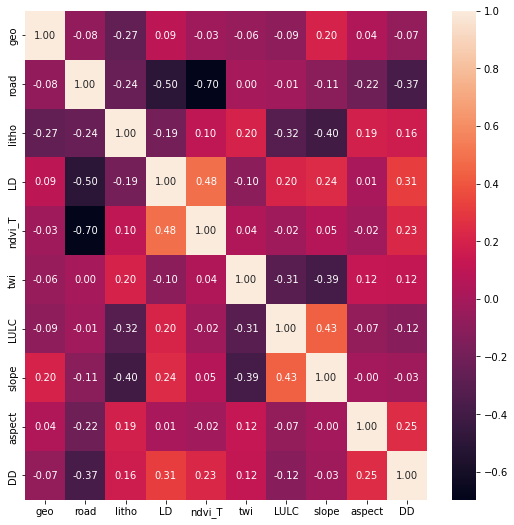

In [ ]:
corr = df_r.corr(method ='pearson')
import seaborn as sn

fig,ax = plt.subplots(figsize=(9,9))
ax = sn.heatmap(corr,fmt ='.2f',annot=True,cbar =True)

plt.show


In [ ]:
df_c = df_points.drop(columns =['geometry'])

In [ ]:
df_c.isnull().sum()
df_c.dropna()
df_c.reset_index(drop=True)

,geo,road,litho,LD,ndvi_T,twi,LULC,slope,aspect,DD,Id
0,2.0,0.000000,6.0,0.080195,0.289495,4.511374,5.0,39.480736,280.491486,1.919997,1
1,2.0,0.000000,6.0,0.080195,0.824188,2.323761,5.0,50.747879,247.416153,1.907240,1
2,2.0,0.000000,6.0,0.080195,0.863234,10.141537,5.0,35.780071,240.945389,1.894235,1
3,2.0,0.000000,4.0,0.235854,0.346268,5.166389,7.0,38.113274,78.976547,1.836945,1
4,2.0,288.133026,4.0,0.219220,0.769076,8.427302,7.0,42.328003,81.158188,1.830692,1
...,...,...,...,...,...,...,...,...,...,...,...
132,7.0,17915.294922,2.0,0.000000,-0.117570,5.367736,1.0,3.337111,210.963760,0.747359,0
133,5.0,19478.304688,1.0,0.139481,NaN,5.843851,6.0,28.516256,6.340192,0.152507,0
134,5.0,18449.515625,1.0,0.295252,-0.018452,6.339057,6.0,40.726139,2.663001,0.181959,0
135,6.0,0.000000,0.0,0.324770,0.680624,7.365918,1.0,1.811248,161.565048,1.624501,0


In [ ]:
mlfile = df_c.to_csv('/content/drive/MyDrive/MC_NEW-20221123T154430Z-001/mfile.csv',index =False)



DATA PREPROCESSING 

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MC_NEW-20221123T154430Z-001/mfile.csv')

In [ ]:
df.head(2)

,geo,road,litho,LD,ndvi_T,twi,LULC,slope,aspect,DD,Id
0,2.0,0.0,6.0,0.080195,0.289495,4.511374,5.0,39.480736,280.491486,1.919997,1
1,2.0,0.0,6.0,0.080195,0.824188,2.323761,5.0,50.747879,247.416153,1.907240,1


In [ ]:
df.isnull().sum()

geo       0
road      0
litho     0
LD        0
ndvi_T    9
twi       0
LULC      0
slope     0
aspect    0
DD        0
Id        0
dtype: int64

In [ ]:
df_1 = df.dropna()
df_1 =df_1.reset_index(drop =True)

In [ ]:
x = df_1.iloc[:,:-1]
y = df_1.iloc[:,-1]

In [ ]:
x

,geo,road,litho,LD,ndvi_T,twi,LULC,slope,aspect,DD
0,2.0,0.000000,6.0,0.080195,0.289495,4.511374,5.0,39.480736,280.491486,1.919997
1,2.0,0.000000,6.0,0.080195,0.824188,2.323761,5.0,50.747879,247.416153,1.907240
2,2.0,0.000000,6.0,0.080195,0.863234,10.141537,5.0,35.780071,240.945389,1.894235
3,2.0,0.000000,4.0,0.235854,0.346268,5.166389,7.0,38.113274,78.976547,1.836945
4,2.0,288.133026,4.0,0.219220,0.769076,8.427302,7.0,42.328003,81.158188,1.830692
...,...,...,...,...,...,...,...,...,...,...
123,1.0,0.000000,5.0,0.357067,0.716564,4.978884,7.0,4.916666,125.537682,1.929242
124,7.0,17915.294922,2.0,0.000000,-0.117570,5.367736,1.0,3.337111,210.963760,0.747359
125,5.0,18449.515625,1.0,0.295252,-0.018452,6.339057,6.0,40.726139,2.663001,0.181959
126,6.0,0.000000,0.0,0.324770,0.680624,7.365918,1.0,1.811248,161.565048,1.624501


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
123    0
124    0
125    0
126    0
127    0
Name: Id, Length: 128, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer


from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,KFold

from sklearn.metrics import make_scorer, accuracy_score

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 4)

In [ ]:
x_train

,geo,road,litho,LD,ndvi_T,twi,LULC,slope,aspect,DD
91,2.0,3182.533203,5.0,0.192937,0.847724,7.677265,2.0,24.855902,76.263733,0.153030
86,1.0,0.000000,4.0,0.249877,0.688220,6.178208,7.0,17.282328,225.000000,1.841056
81,2.0,11572.047852,2.0,0.236376,0.494228,3.952431,7.0,25.650703,58.626995,1.541634
60,2.0,814.963257,2.0,0.520285,0.741976,4.210331,7.0,59.082649,235.738892,1.891330
118,12.0,11855.544922,2.0,0.000000,-0.072027,2.718584,6.0,39.509712,67.166344,0.251519
...,...,...,...,...,...,...,...,...,...,...
1,2.0,0.000000,6.0,0.080195,0.824188,2.323761,5.0,50.747879,247.416153,1.907240
69,2.0,814.963257,3.0,0.323943,0.634764,3.827592,7.0,15.217896,53.972626,2.333878
55,7.0,2656.455322,2.0,0.336291,-0.056343,10.514657,5.0,29.618525,230.710587,2.635827
46,2.0,0.000000,2.0,0.380220,0.746185,5.139573,7.0,47.695637,193.150955,2.199485


In [ ]:



# soil_idx = list(stack.names).index("soil")
# geomorphology_idx = list(stack.names).index("geomorphology")
# underground_idx = list(stack.names).index("underground")
# prequaternary_idx = list(stack.names).index("prequaternary")
# print(soil_idx, geomorphology_idx, underground_idx, prequaternary_idx)



# preprocessor = ColumnTransformer([
#     ('ohe_soil', OneHotEncoder(categories='auto', handle_unknown='ignore'), categorical_features),
#     ('num', StandardScaler(), numerical_features)])


# from sklearn.svm import SVC
# # Create a model
# svm = SVC(probability=True, random_state=42)

# svm_flow = Pipeline([
#     ('preproc', preprocessor),
#     ('classifier', svm)
# ])

# # Instantiate the grid search model with 10-fold cross-validation
# inner = KFold(n_splits=10, shuffle=True, random_state=42)
# model_svm = GridSearchCV(svm_flow, param_grid = param_grid_SVM, cv = inner, scoring=acc_scorer)


# # Fit the grid search to the data
# model_svm.fit(X_train, y_train)
# model_svm.best_params_


In [ ]:
names = list(df_1.columns)
import statsmodels.api as sm
df.head()
vf = df_1.iloc[:,:-1]
name = list(vf.columns)

for i in range(0, len(name)):
    y = vf.loc[:, vf.columns == name[i]]
    x = vf.loc[:,vf.columns != name[i]]
    model = sm.OLS(y, x)
    results = model.fit()
    rsq = results.rsquared
    vif = round(1 / (1 - rsq), 2)
    print(
        "R Square value of {} column is {} keeping all other columns as features".format(
            name[i], (round(rsq, 2))
        )
    )
    print(
        "Variance Inflation Factor of {} column is {} \n".format(
            name[i], vif)
        )

R Square value of geo column is 0.63 keeping all other columns as features
Variance Inflation Factor of geo column is 2.71 

R Square value of road column is 0.54 keeping all other columns as features
Variance Inflation Factor of road column is 2.19 

R Square value of litho column is 0.68 keeping all other columns as features
Variance Inflation Factor of litho column is 3.11 

R Square value of LD column is 0.89 keeping all other columns as features
Variance Inflation Factor of LD column is 8.82 

R Square value of ndvi_T column is 0.84 keeping all other columns as features
Variance Inflation Factor of ndvi_T column is 6.32 

R Square value of twi column is 0.85 keeping all other columns as features
Variance Inflation Factor of twi column is 6.6 

R Square value of LULC column is 0.92 keeping all other columns as features
Variance Inflation Factor of LULC column is 11.95 

R Square value of slope column is 0.81 keeping all other columns as features
Variance Inflation Factor of slope c

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


IndexError: ignored

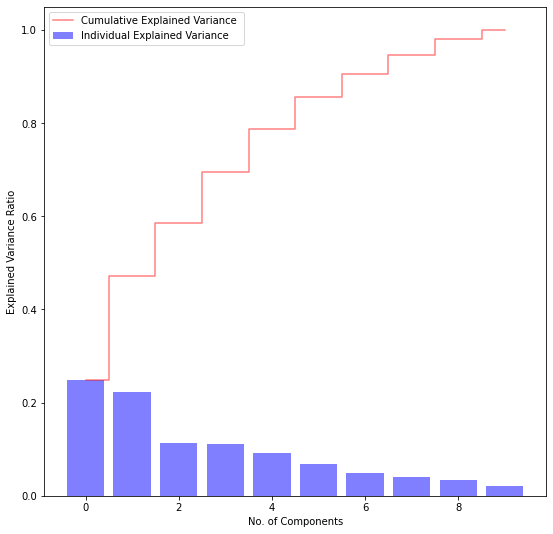

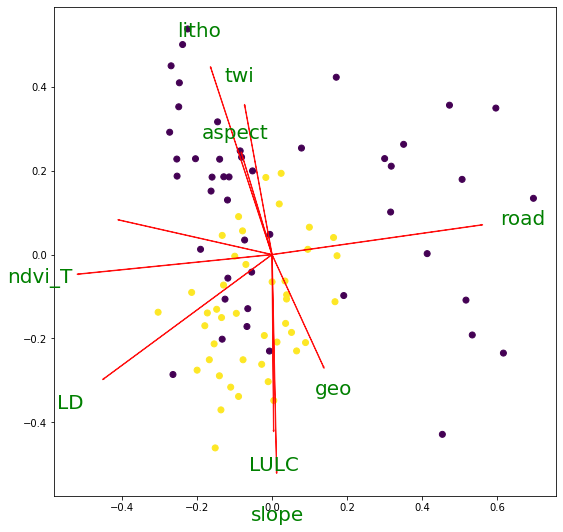

In [ ]:
from sklearn.decomposition import PCA
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
pca = PCA()
x_train_pca = pca.fit_transform(x_train_std)

exp_var_pca = pca.explained_variance_ratio_

cumsum_pca = np.cumsum(exp_var_pca)

plt.figure(figsize =(9,9))
plt.bar(range(0,len(exp_var_pca)),exp_var_pca,alpha = 0.5,align='center',color ='blue',label ='Individual Explained Variance ')
plt.step(range(0,len(cumsum_pca)),cumsum_pca,alpha =0.5,where='mid',color ='red',label = 'Cumulative Explained Variance ')
plt.xlabel('No. of Components')
plt.ylabel('Explained Variance Ratio')
plt.legend(loc ='best')
#plt.savefig('/content/drive/MyDrive/Machine Learning data/Results/pca_explained_variance1.png',dpi=700,bbox_inches ='tight')
plt.show

loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = x_train.columns
loadings_df = loadings_df.set_index('variable')
loadings_df


def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    scatter = plt.scatter(xs * scalex,ys * scaley, c= y_train)
    
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha =0.9)
        if labels is None:
            plt.text(coeff[i,0]* 1.2, coeff[i,1] * 1.2, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.2, coeff[i,1] * 1.2, labels[i], color = 'g', ha = 'center', va = 'center',fontsize = 20)
 
    labels = np.unique(y)
    handles = [plt.Line2D([],[],marker="o", ls="", 
                      color=scatter.cmap(scatter.norm(yi))) for yi in labels]
    plt.legend(handles, labels, loc=7, title='Class', title_fontsize='xx-large', fontsize='xx-large')
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
    

    
f, ax = plt.subplots(figsize=(9,9))
myplot(x_train_pca[:,0:2],np.transpose(pca.components_[0:2, :]),list(x.columns))
#plt.savefig(r'/content/drive/MyDrive/LSM_Paper_Project/Figures/loadings_pca.png', bbox_inches='tight', dpi=600)
plt.show()

In [ ]:
geo_idx = list(stack.names).index("geo")
lulc_idx = list(stack.names).index("LULC")
litho_idx = list(stack.names).index("litho")
print( geo_idx, lulc_idx,litho_idx)


0 6 2


In [ ]:
categorical_features =[0,2,6]
numerical_features =[1,3,4,5,7,8,9]

In [ ]:

preprocessor = ColumnTransformer([
    ('ohe_soil', OneHotEncoder(categories='auto', handle_unknown='ignore'), categorical_features),
    ('num', StandardScaler(), numerical_features)])


In [ ]:
!pip install xgboost
import xgboost
classifier = xgboost.XGBClassifier()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
rf_flow = Pipeline([
    ('preproc', preprocessor),
    ('xg', classifier)
])

In [ ]:
acc_scorer = make_scorer(accuracy_score)

params={
 "xg__learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "xg__max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "xg__min_child_weight" : [ 1, 3, 5, 7 ],
 "xg__colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
}

In [ ]:
# Instantiate the grid search model with 10-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
model_xgb = GridSearchCV(rf_flow, param_grid = params, cv = kfold, scoring=acc_scorer)


# Fit the grid search to the data
model_xgb.fit(x_train, y_train)
model_xgb.best_params_


{'xg__colsample_bytree': 0.7,
 'xg__learning_rate': 0.05,
 'xg__max_depth': 4,
 'xg__min_child_weight': 1}

In [ ]:
y_pred = model_xgb.predict(x_test)
y_pred_xg_prob = model_xgb.predict_proba(x_test)
y_pred_xg_prob = y_pred_xg_prob[:,1]
y_pred_xg_prob

array([0.05212592, 0.9646843 , 0.85168844, 0.9711567 , 0.96448654,
       0.02080987, 0.8965012 , 0.9308775 , 0.03362069, 0.03280272,
       0.73666865, 0.13273937, 0.97693014, 0.04722147, 0.92290497,
       0.04736602, 0.0643418 , 0.02409743, 0.8111128 , 0.67852944,
       0.93240696, 0.04304558, 0.04133114, 0.97633535, 0.02040786,
       0.04250749, 0.5858157 , 0.93639183, 0.02259308, 0.02384847,
       0.97177327, 0.9812556 , 0.9692973 , 0.9744605 , 0.47905508,
       0.02827839, 0.9601086 , 0.0211711 , 0.02564969], dtype=float32)

[[15  2]
 [ 4 18]]


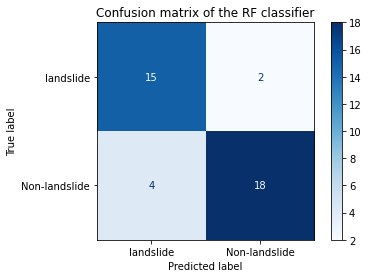

In [ ]:
from sklearn.metrics import  accuracy_score, confusion_matrix
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, 
                                        cmap="Blues", 
                                        display_labels=["landslide","Non-landslide"])

plt.title('Confusion matrix of the RF classifier')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score,roc_curve,auc
print(accuracy_score(y_test, y_pred))

0.8461538461538461


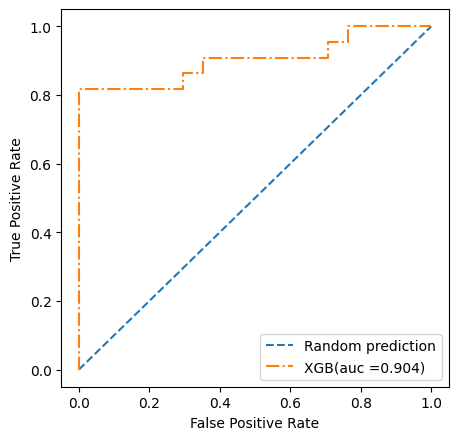

<Figure size 432x288 with 0 Axes>

In [ ]:
r_probs = [0 for _ in range(len(y_test))]

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
xgb_fpr,xgb_tpr,threshold = roc_curve(y_test,y_pred_xg_prob)
auc_xgb = auc(xgb_fpr,xgb_tpr)

plt.figure(figsize=(5,5),dpi =100)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction')
plt.plot(xgb_fpr,xgb_tpr,linestyle='-.',label ='XGB(auc =%0.3f)'%auc_xgb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()
plt.savefig('/content/drive/MyDrive/NEW_DATA/auc_xgb_gangotri.png',dpi = 700)

In [ ]:
!profile.update(BIGTIFF = "IF_SAFER")

/bin/bash: -c: line 0: syntax error near unexpected token `BIGTIFF'
/bin/bash: -c: line 0: `profile.update(BIGTIFF = "IF_SAFER")'


In [ ]:
import warnings

warnings.filterwarnings("ignore")

array([<AxesSubplot:title={'center':'prob_0'}>,
       <AxesSubplot:title={'center':'prob_1'}>], dtype=object)

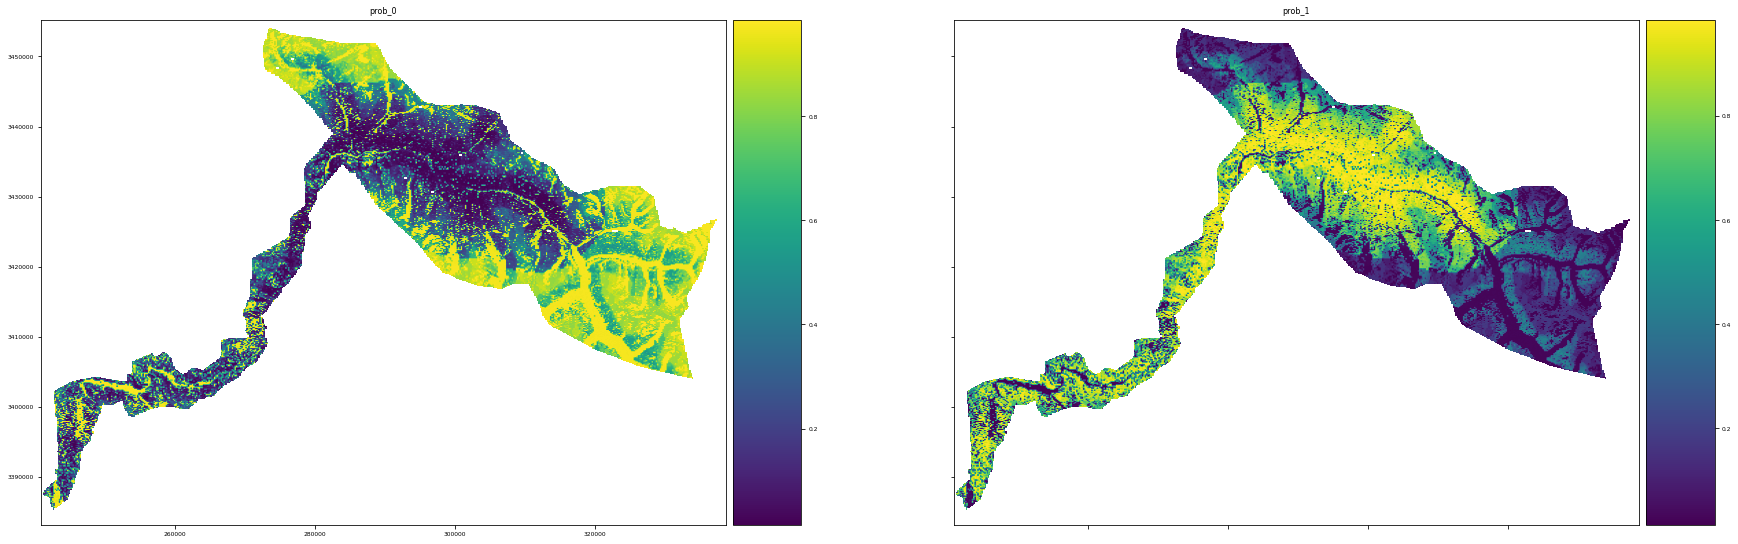

In [ ]:
result_xgb = stack.predict_proba(estimator = model_xgb)

result_xgb.plot(figsize =(30,30))

In [ ]:
result_xgb.write('/content/drive/MyDrive/Useful for writing and knowledge papers/XGB_GANG_2023.tif',nodata=-9999)

Raster Object Containing 2 Layers
    attribute                                             values
0       names                                   [prob_0, prob_1]
1       files  [/content/drive/MyDrive/Useful for writing and...
2        rows                                               7204
3        cols                                               9778
4         res              (9.99995258800289, 9.999952588002905)
5  nodatavals                                 [-9999.0, -9999.0]


MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
classifier1 = MLPClassifier()
rf_flow = Pipeline([
    ('preproc', preprocessor),
    ('MLP', classifier1)
])

In [ ]:
acc_scorer = make_scorer(accuracy_score)

grid_mlp = {
    'MLP__hidden_layer_sizes':[10,15,(15,10)],
    'MLP__activation': ['relu'],
    'MLP__solver': ['adam'],
    'MLP__alpha' : [0.0001,0.001,0.1,0.3],
    'MLP__learning_rate':['adaptive'],
    'MLP__learning_rate_init': [0.01,0.001,0.0001],
    'MLP__max_iter': [200,500],
    'MLP__shuffle': [True,False] 
}

In [ ]:
# Instantiate the grid search model with 10-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
model_mlp = GridSearchCV(rf_flow, param_grid = grid_mlp, cv = kfold, scoring=acc_scorer)


# Fit the grid search to the data
model_mlp.fit(x_train, y_train)
model_mlp.best_params_

{'MLP__activation': 'relu',
 'MLP__alpha': 0.3,
 'MLP__hidden_layer_sizes': 10,
 'MLP__learning_rate': 'adaptive',
 'MLP__learning_rate_init': 0.01,
 'MLP__max_iter': 500,
 'MLP__shuffle': False,
 'MLP__solver': 'adam'}

In [ ]:
y_pred_mlp = model_mlp.predict(x_test)
y_pred_mlp_prob = model_mlp.predict_proba(x_test)
y_pred_mlp_prob = y_pred_mlp_prob[:,1]
y_pred_mlp_prob

array([2.93357776e-01, 9.93043646e-01, 9.18526357e-01, 9.93630787e-01,
       9.81939735e-01, 2.28872125e-03, 6.38853195e-01, 9.98731869e-01,
       1.27553590e-02, 2.17362105e-03, 3.75920841e-01, 9.39208678e-03,
       9.48649051e-01, 3.80855819e-03, 9.84726000e-01, 4.45593873e-03,
       7.43912886e-01, 1.71044424e-03, 7.81969864e-01, 1.56433377e-02,
       9.97016415e-01, 9.10711038e-03, 9.54962560e-01, 9.98143110e-01,
       2.53494434e-03, 9.10570304e-03, 4.14297875e-02, 4.55132889e-01,
       1.24939231e-04, 2.98144104e-02, 9.87030560e-01, 9.99980301e-01,
       6.86898030e-01, 9.99993215e-01, 2.02759131e-02, 4.28365521e-03,
       9.72971241e-01, 6.85739124e-04, 1.73077867e-02])

[[15  2]
 [ 6 16]]


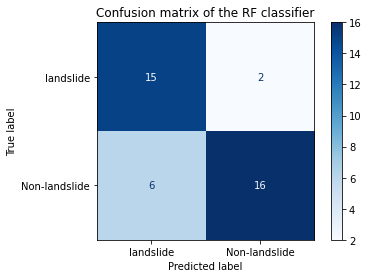

In [ ]:
from sklearn.metrics import  accuracy_score, confusion_matrix
print(confusion_matrix(y_test, y_pred_mlp))
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_mlp, 
                                        cmap="Blues", 
                                        display_labels=["landslide","Non-landslide"])

plt.title('Confusion matrix of the RF classifier')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score,roc_curve,auc
print(accuracy_score(y_test, y_pred_mlp))

0.7948717948717948


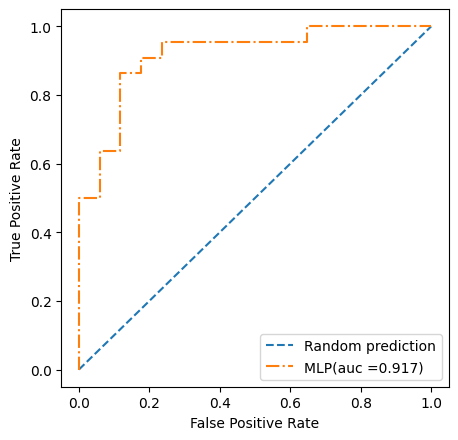

<Figure size 432x288 with 0 Axes>

In [ ]:
r_probs = [0 for _ in range(len(y_test))]

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
xgb_fpr,xgb_tpr,threshold = roc_curve(y_test,y_pred_mlp_prob)
auc_xgb = auc(xgb_fpr,xgb_tpr)

plt.figure(figsize=(5,5),dpi =100)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction')
plt.plot(xgb_fpr,xgb_tpr,linestyle='-.',label ='MLP(auc =%0.3f)'%auc_xgb)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()

plt.show()
plt.savefig('/content/drive/MyDrive/Raw variables/MLP_auc.png',dpi = 700)

array([<AxesSubplot:title={'center':'prob_0'}>,
       <AxesSubplot:title={'center':'prob_1'}>], dtype=object)

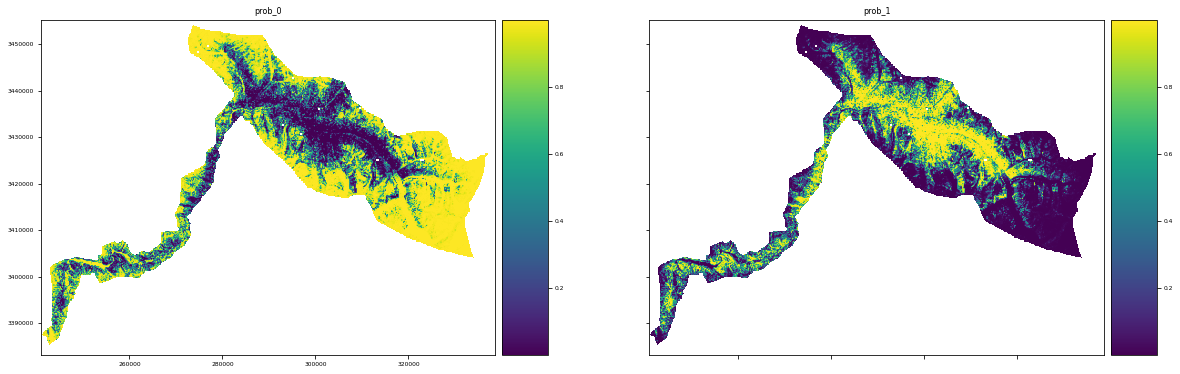

In [ ]:
result_mlp = stack.predict_proba(estimator = model_mlp)

result_mlp.plot(figsize =(20,20))

In [ ]:
result_mlp.write('/content/drive/MyDrive/Useful for writing and knowledge papers/MLP_GANG_2023.tif',nodata=-9999)

Raster Object Containing 2 Layers
    attribute                                             values
0       names                                   [prob_0, prob_1]
1       files  [/content/drive/MyDrive/Useful for writing and...
2        rows                                               7204
3        cols                                               9778
4         res              (9.99995258800289, 9.999952588002905)
5  nodatavals                                 [-9999.0, -9999.0]
